# **Getting started with Titanic**

In [1]:
# Librerías necesarias

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Los archivos de datos están disponibles en el directorio "../input/" 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


Hay tres archivos que existen en este fichero: (1) train.csv, (2) test.csv y (3) gender_submission.csv

En esta celda cargamos el archivo train.csv, contiene información de los pasajeros a bordo (891 pasajeros, uno por cada celda en la tabla)

Los valores en la columna "Survived" determinan si el pasajero sobrevivió o no: 
- si es un "1", el pasajero sobrevivió
- si es un "0", el pasajero murió


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Vamos a mirar cuáles son las características de nuestros datos :

- Pclass : 1st = Upper Class 2nd = Middle Class 3rd = Lower Class

- sibsp : The # of siblings / spouses aboard the Titanic 
       Sibling = brother, sister, stepbrother, stepsister 
       Spouse = husband, wife 

- parch : The # of parents / children aboard the Titanic 
    Parent = mother, father 
    Child = daughter, son, stepdaughter, stepson 

- Ticket : Ticket number

- Fare : Passenger fare

- Cabin : Cabin number embarked

- Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton

Adeamás tenemos las características Name, Sex y Age.

En esta celda cargamos el archivo test.csv, contiene información pasajeros a bordo (418 pasajeros). A partir de los patrones de train.csv, se va predecir si el pasajero sobrevivió o no.

In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Primero vamos a realizar un análisis de los datos (Exploratory Data Analysis o EDA). 

Para comenzar a controlar el total de los valores nulos de las celdas.

In [4]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Las columnas de Edad, la Cabina y el Embarque contienen valores nulos. Hay que intentar arreglar esas celdas para que contengan algún valor.

Vamos a realizar dos gráficos que representen el número de pasajeros que sobrevivieron.

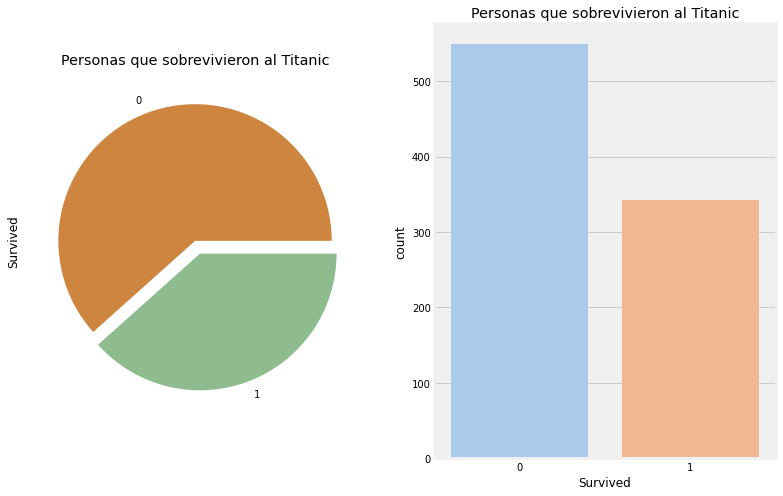

In [5]:
f,ax=plt.subplots(1,2,figsize=(12,8))
train_data['Survived'].value_counts().plot.pie(explode=[0,0.1],ax=ax[0], colors = ['peru', 'darkseagreen'] )
ax[0].set_title('Personas que sobrevivieron al Titanic')
sns.countplot('Survived',data=train_data, ax=ax[1], palette="pastel")
ax[1].set_title('Personas que sobrevivieron al Titanic')
plt.show()

Podemos observar que no demasiados pasajeros sobrevivieron. La clase 0 ( Not Survived ) es mayoritaria. 

Unos 330 pasajeros, del total de 891 pasajeros del trains.csv, sobrevivieron. 

Ahora debemos realizar un análisis más profundo para entender mejor los datos, y cómo distinguir entre la clase 0 y 1. Vamos a usar para ello las diferenets características del dataset. 


Ahora vamos a observar los diferentes tipos de características que podemos encontrar.

Por ejemplo tenemos como características categóricas en este dataset, el género o la supervivencia. Una categorical feature tiene dos o más categorías a las que puede pertenecer. 

En este celda contamos el número de instancias dependiendo de la categoría "Sex" y "Survived"

In [6]:
train_data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

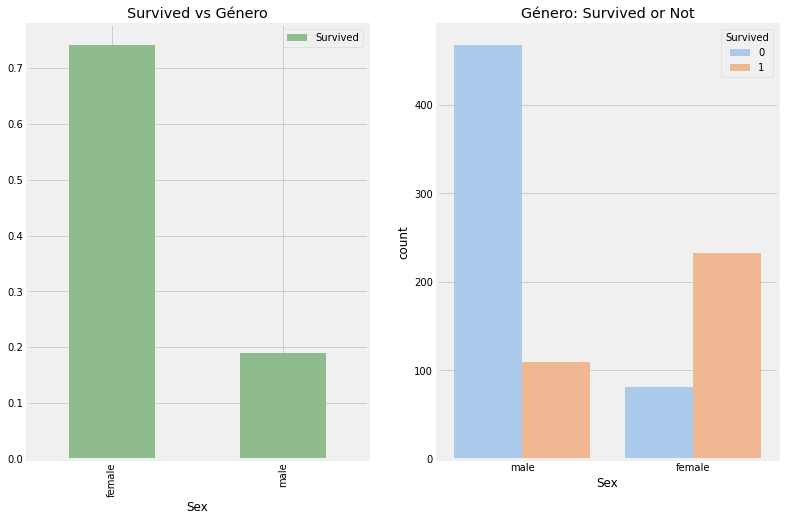

In [7]:
f,ax=plt.subplots(1,2,figsize=(12,8))
train_data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0], color=['darkseagreen'])
ax[0].set_title('Survived vs Género')
sns.countplot('Sex',hue='Survived',data=train_data,ax=ax[1], palette="pastel")
ax[1].set_title('Género: Survived or Not')
plt.show()

- Primero podemos observar que el número de hombres en el barco es mucho mayor que el número de mujeres. 
- Pero además en la segunda figura vemos que el número de supervivientes en las mujeres es casi el doble.

Podemos pensar que esta característica es decisiva en nuestro modelo. Vamos a mirar otras.

Ahora vamos a mirar una categoría ordinal. Este tipo de categoría tiene un orden entre los valores. En nuestro caso en el barco podemos encontrar tres tipos de clases sociales("Pclass"). 

In [8]:
pd.crosstab(train_data.Pclass,train_data.Survived,margins=True).style.background_gradient(cmap='Pastel2')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


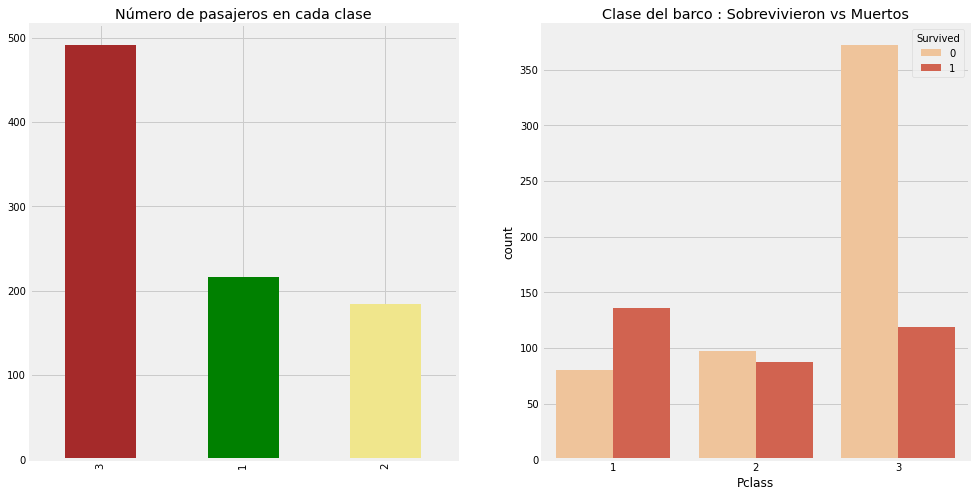

In [9]:
f,ax=plt.subplots(1,2,figsize=(15,8))
train_data['Pclass'].value_counts().plot.bar(color=['brown','green','khaki'],ax=ax[0])
ax[0].set_title('Número de pasajeros en cada clase')
sns.countplot('Pclass',hue='Survived',data=train_data,ax=ax[1], palette="OrRd")
ax[1].set_title('Clase del barco : Sobrevivieron vs Muertos')
plt.show()

En el primer gráfico podemos ver la diferencia del número de personas en cada clase del barco. Podemos observar que los pasajeros de la Clase 1 se les dió preferencia a la hora del rescate. Solo hay que ver el número de pasajeros de la Clase 3 fue mucho mayor, pero la supervivencia de ellos fue mucho menor. 

Vamos a indagar un poco más y mirar el índice de conexión entre la Clase y el Género juntos.

In [10]:
pd.crosstab([train_data.Sex,train_data.Survived],train_data.Pclass,margins=True).style.background_gradient(cmap='Pastel2')

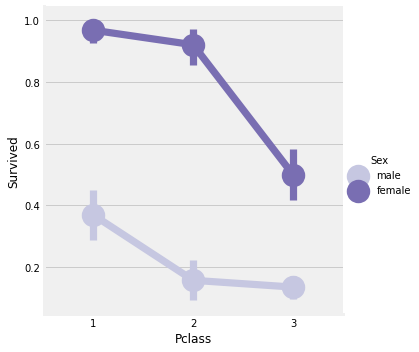

In [11]:
sns.factorplot('Pclass','Survived',hue='Sex',data=train_data, palette="Purples")
plt.show()

En la anterior figura podemos ver la separación entre dos características categóricas, usamos para ello FactorPlot.

Gracias al gráfico podemos ver que la supervivencia de Mujeres de Clase 1 es casi del 96 %. 

Aunque podemos ver que las Mujeres en general tuvieron más prefrencia incluso sin mirar la Clase.

Podemos asegurar que la Clase (Pclass) es otra de las características de vital importancia para nuestro modelo.

Ahora miraremos la característica de la Edad en nuestro modelo. Esta es un feature continua, que toma entre dos valores entre un punto.

In [12]:
print('Pasajero más mayor:',train_data['Age'].max(),'años')
print('Pasajero más joven:',train_data['Age'].min(),'años')
print('Media de edad en el Titanic:',train_data['Age'].mean(),'años')

Pasajero más mayor: 80.0 años
Pasajero más joven: 0.42 años
Media de edad en el Titanic: 29.69911764705882 años


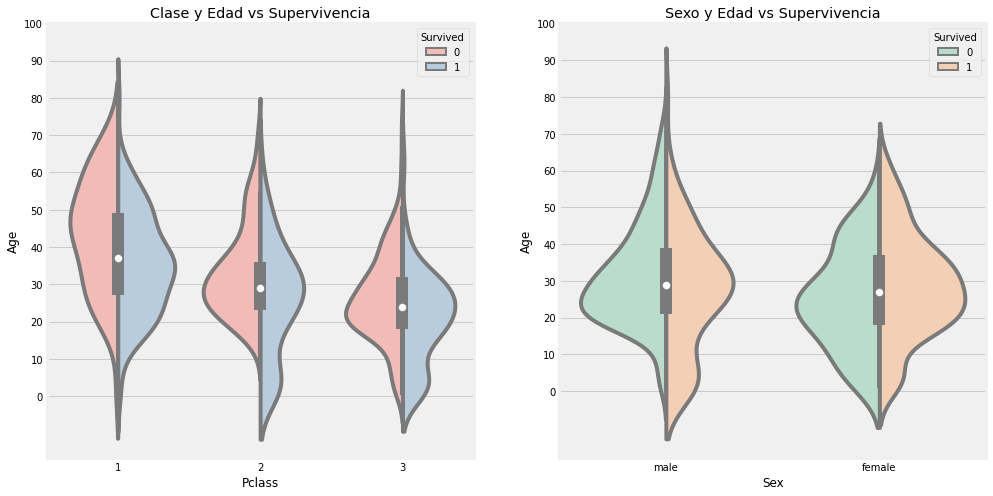

In [13]:
f,ax=plt.subplots(1,2,figsize=(15,8))
sns.violinplot("Pclass","Age", hue="Survived", data=train_data,split=True,ax=ax[0], palette="Pastel1")
ax[0].set_title('Clase y Edad vs Supervivencia')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=train_data,split=True,ax=ax[1], palette="Pastel2")
ax[1].set_title('Sexo y Edad vs Supervivencia')
ax[1].set_yticks(range(0,110,10))
plt.show()

Podemos realizar las siguientes observaciones de la figura:

1) La probabilidad de supervivencia de los niños parece independiente de la edad.

2) La probabilidad de supervivencia en la Clase 1 es lato e incluso mejro para las mujeres.

3) Para los hombres, la probabilidad de supervivencia baja al aumentar la edad.

4) La probabilidad de supervivencia de las mujeres es mayor.

Como hemos visto hay muchos valores nulos en la columna de la Edad. Para reemplazar los valores NaN, podemos asignarles el valor de la media. 

Pero no podemos asignar un valor tan iomportante como la edad de manera aleatoria. 

Se nos puede ocurrir utilizar la columna Name, para utilizar el prefijo Mr or Mrs como intuición de la Edad. 

In [14]:
train_data['Initial']=0
for i in train_data:
    train_data['Initial']=train_data.Name.str.extract('([A-Za-z]+)\.') 

Asi podemos extraer las Iniciales del Nombre.

In [15]:
pd.crosstab(train_data.Initial,train_data.Sex).T.style.background_gradient(cmap='Pastel2') 

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Hay ocaciones que Miss puede estar mal escrito con Mlle or Mme. Las reemplazamos.

In [16]:
train_data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

Vamos a mirar la media de edad por cada prefijo de Nombre.

In [17]:
train_data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

Vamos ahora a reemplazarlos con la edad media

In [18]:
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Mr'),'Age']=33
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Mrs'),'Age']=36
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Master'),'Age']=5
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Miss'),'Age']=22
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Other'),'Age']=46

Ahora podemos asegurar que no hay valor nulo para la columna Edad

In [19]:
train_data.Age.isnull().any()

False

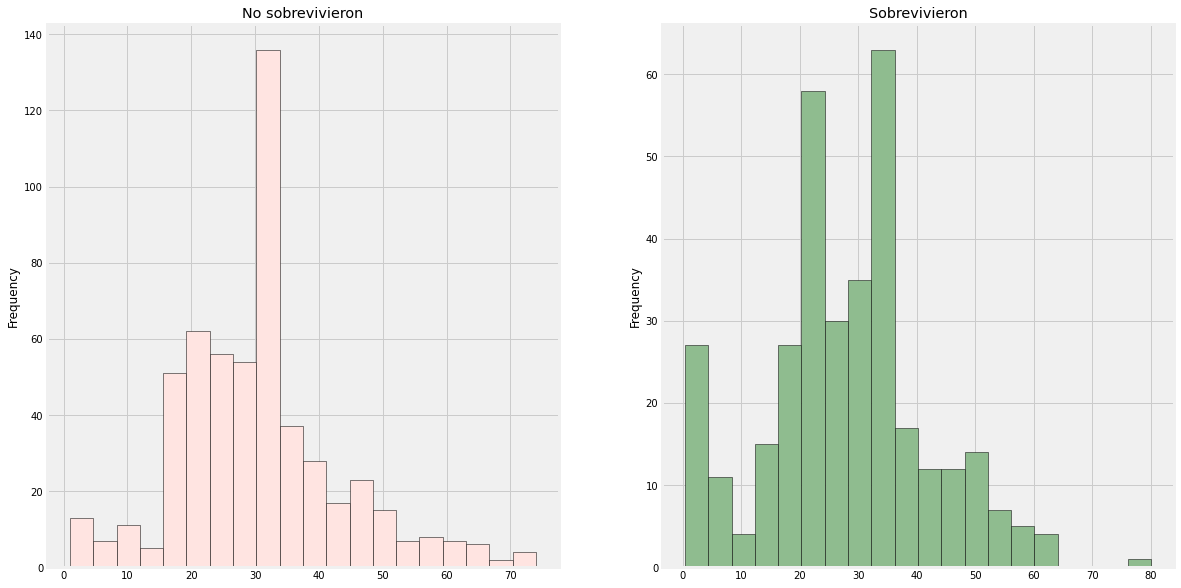

In [20]:
f,ax=plt.subplots(1,2,figsize=(18,10))
train_data[train_data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='mistyrose')
ax[0].set_title('No sobrevivieron')
train_data[train_data['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black', color='darkseagreen')
ax[1].set_title('Sobrevivieron')
plt.show()

Ahora vamos a tarazar obbservaciones de las anteriores figuras:

1) Hay muy pocos niños que no sobreviviesen. 

2) Solo hay un pasajero de 80 años que sobreviviese.

3) El número máximo de muertos están entre 30-40 años.

Hay otra característica categórica en el datset, "Embarked". Se paró en tres puertos C, Q, S. Vamos a ver que consecuencias tuvo esta característica.

In [21]:
pd.crosstab([train_data.Embarked,train_data.Pclass],[train_data.Sex,train_data.Survived],margins=True).style.background_gradient(cmap='Pastel2')

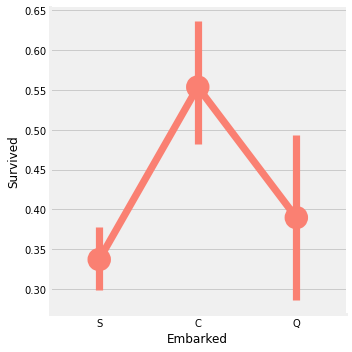

In [22]:
sns.factorplot('Embarked','Survived',data=train_data, color="salmon")
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.show()

Aquí podemos ver la probabilidad de sobrevivir dependinedo del puerto del que embarcases. La probabilidad de supervivencia del Puerto C es la mayor del 0.55, mientras que el puerto S y Q tienen una probabilidad mucho menor.

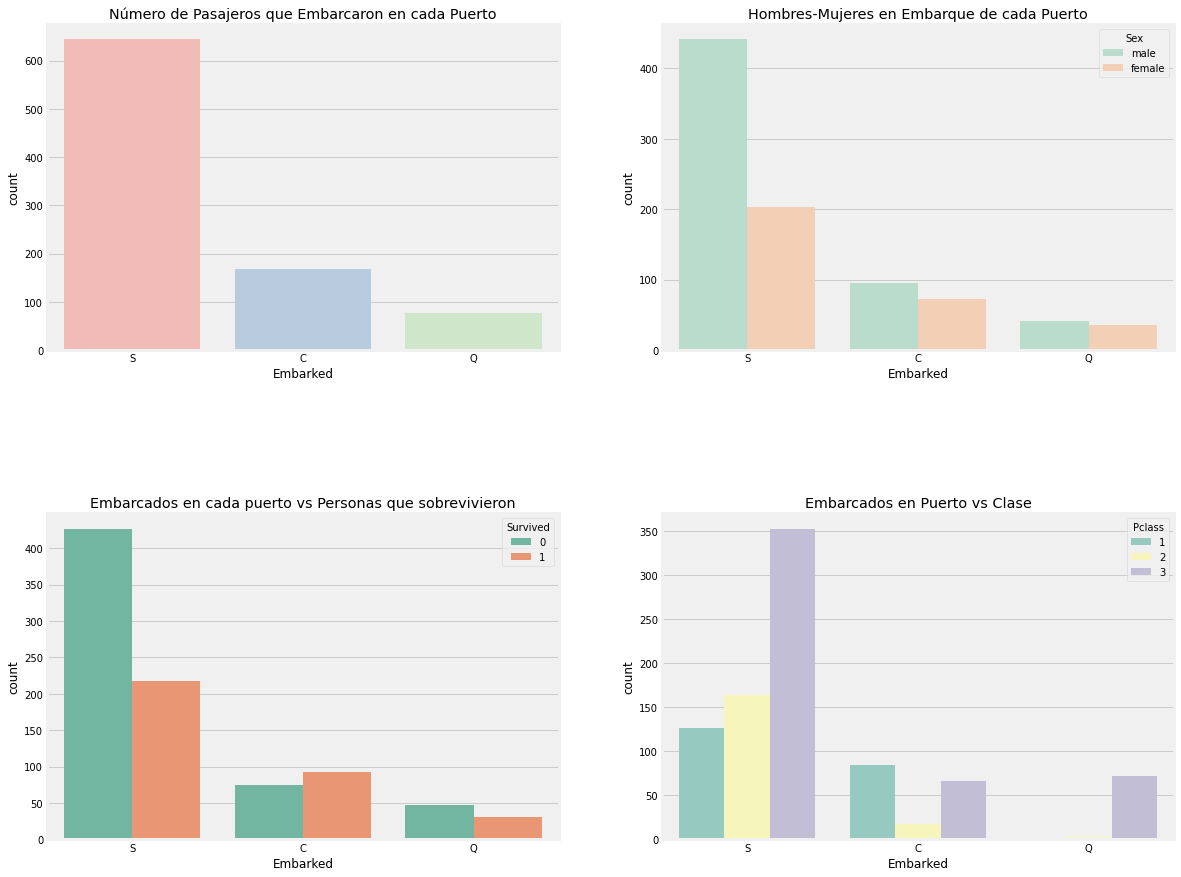

In [23]:
f,ax=plt.subplots(2,2,figsize=(18,15))
sns.countplot('Embarked',data=train_data,ax=ax[0,0], palette="Pastel1")
ax[0,0].set_title('Número de Pasajeros que Embarcaron en cada Puerto')
sns.countplot('Embarked',hue='Sex',data=train_data,ax=ax[0,1], palette="Pastel2")
ax[0,1].set_title('Hombres-Mujeres en Embarque de cada Puerto')
sns.countplot('Embarked',hue='Survived',data=train_data,ax=ax[1,0], palette="Set2")
ax[1,0].set_title('Embarcados en cada puerto vs Personas que sobrevivieron')
sns.countplot('Embarked',hue='Pclass',data=train_data,ax=ax[1,1], palette="Set3")
ax[1,1].set_title('Embarcados en Puerto vs Clase')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

Vamos a realizar alguna observación de las siguientes figuras:

1) La mayoría de pasajeros que embarcaron en el puerto S eran de Clase 3.

2) En el puerto C parece que hubo muchas probabilidades de sobrevivir. Esto puede que fuese porque hubiese muchos pasajeros de Clase 1 y Clase 2.

3) En el puerto S embarcaron personas ricas (Clase 1). Pero como hubo muchos pasajeros de otras clases, las probilidades de sobrevivir son bajas. 

4) En el puerto Q solo embarcaron pasajeros de Clase 3.

5) Hubo muy pocos pasajeros que embarcasen en puerto Q.

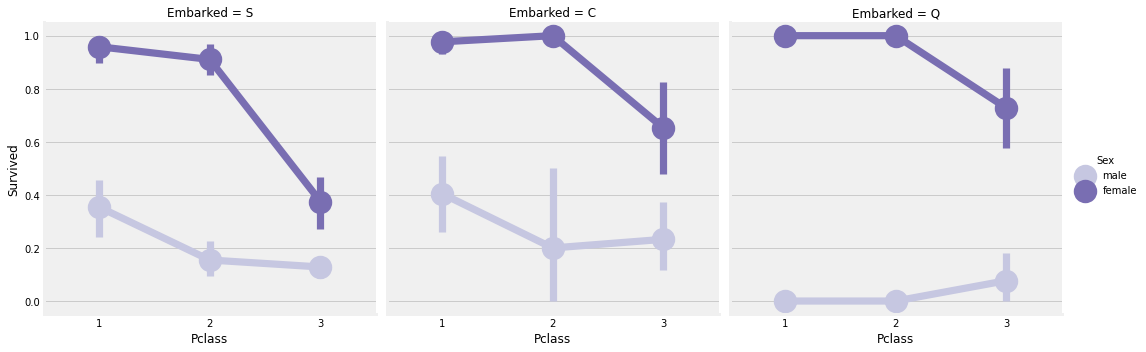

In [24]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=train_data, palette="Purples")
plt.show()

Vamos a realizar alguna observación de las siguientes figuras:

1) El índice de supervivencia es casi de 1 para Mujeres de Clase 1 y Clase 2.

2) Para los hombres el índice de supervivencia de Clase 3 es muy bajo. 

Vamos a seguir rellenando valores NaN

Como podemos ver que la mayoría de personas embarcaron del puerto S, vamos a reemplazar los valores nulos por este puerto.

In [25]:
train_data['Embarked'].fillna('S',inplace=True)

Asegurar que no queden valores nulos.

In [26]:
train_data.Embarked.isnull().any()

False

Vamos ahorar a mirar una nueva característica (SibSip). La mayoría de personas viajaron con compañía y vamos a ver la influencia de esta carcterística en el dataset. 

Esta característica representa si una persona viajó sola o con familiares.

In [27]:
pd.crosstab([train_data.SibSp],train_data.Survived).style.background_gradient(cmap='Pastel2')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


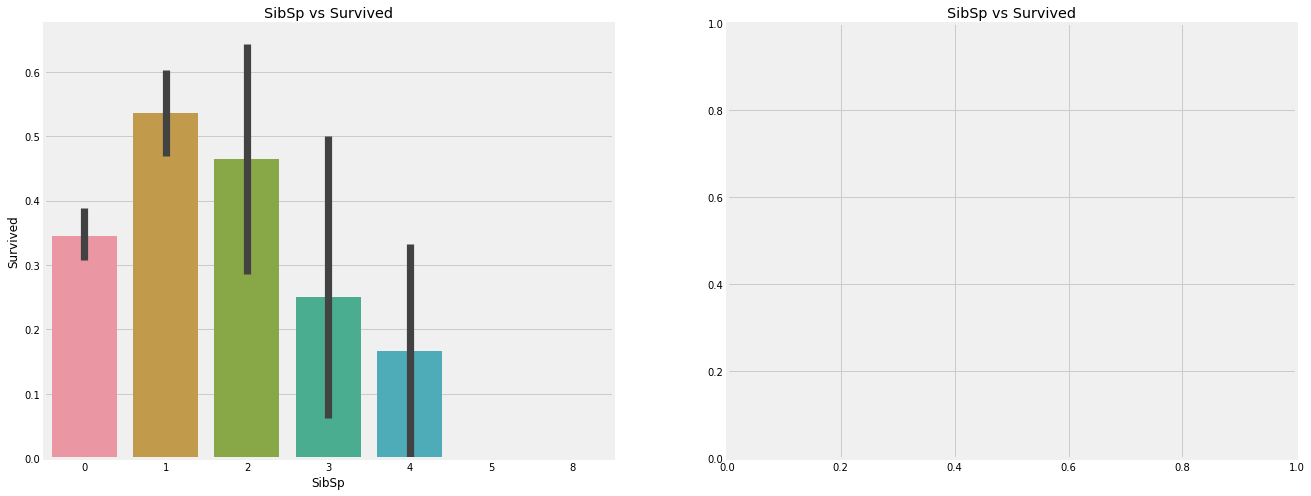

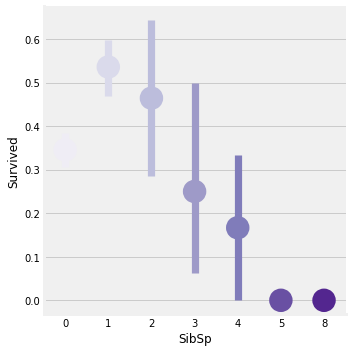

In [28]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=train_data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=train_data,ax=ax[1], palette="Purples")
ax[1].set_title('SibSp vs Survived')
plt.show()

In [29]:
pd.crosstab(train_data.SibSp,train_data.Pclass).style.background_gradient(cmap='Pastel2')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


El barplot y factorplot muestra que si un pasajero está solo tiene en torno al 30% de índice de supervivencia. Al aumentar el número de familiares decrece el índice de supervivencia. Tiene sentido, si estamos con familia intentaremos salvar a nuestros seres queridos. 

Pero en vamos que viajando con miembros de familia de entre 5-8, es del 0%. A lo mejor es por la clase.

Más tarde vemos que es así, las personas con más de 3 hermanos estaban casi todos en Clase 3. Familias más humildes y con mayor número de hijos.


Ahora miramos otra característica importante, la tarifa.

In [30]:
print('La tarifa más alta fue:',train_data['Fare'].max())
print('La tarifa más baja fue:',train_data['Fare'].min())
print('La tarifa media fue:',train_data['Fare'].mean())

La tarifa más alta fue: 512.3292
La tarifa más baja fue: 0.0
La tarifa media fue: 32.2042079685746


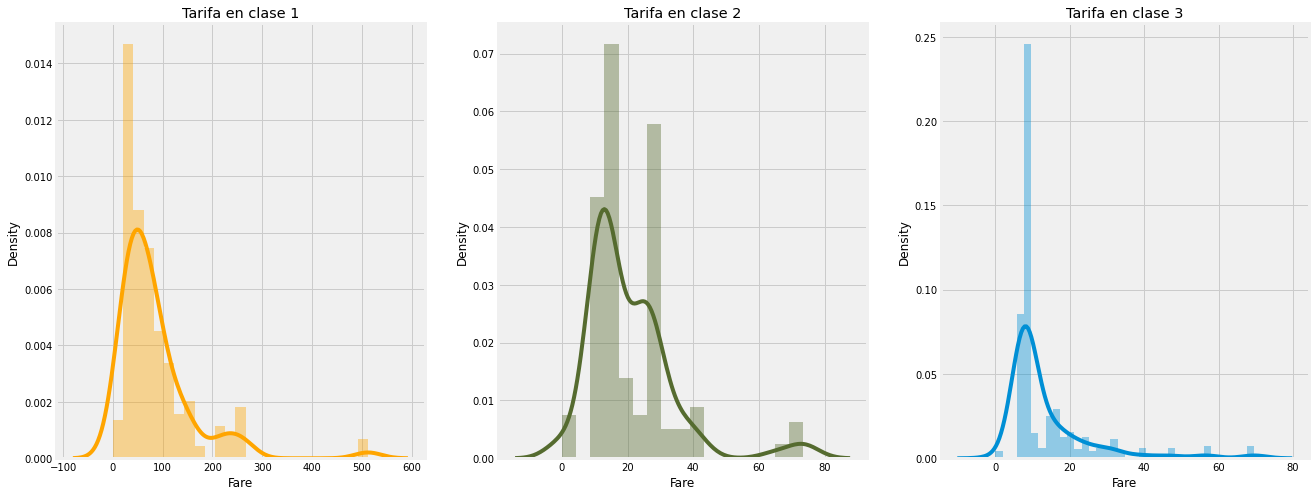

In [31]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(train_data[train_data['Pclass']==1].Fare,ax=ax[0], color="orange")
ax[0].set_title('Tarifa en clase 1')
sns.distplot(train_data[train_data['Pclass']==2].Fare,ax=ax[1], color="darkolivegreen")
ax[1].set_title('Tarifa en clase 2')
sns.distplot(train_data[train_data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Tarifa en clase 3')
plt.show()

En estos gráficos podemos ver la proporción de las tarifas en las distintas clases. Parece una característica correlacionada con las clase del barco.

Por último en nuestro EDA, vamos a mirar la correlación entre caracterísiticas con nuestro heatmap.

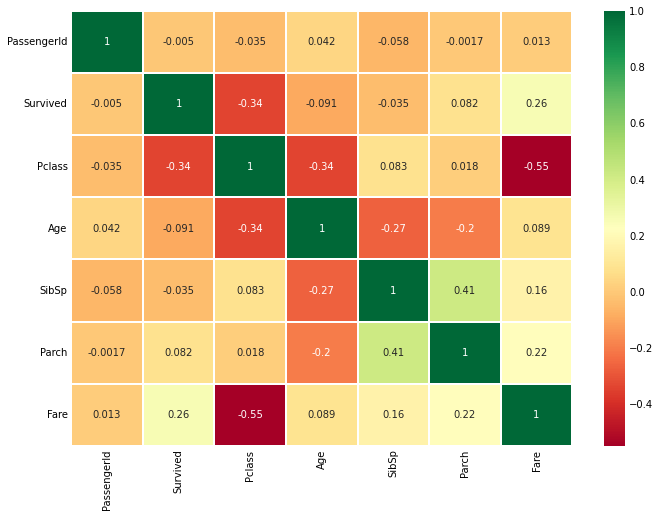

In [32]:
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.4) 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()


- POSITIVE CORRELATION: If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation.

- NEGATIVE CORRELATION: If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation.

Si dos características están correlacionadas positivamente, indica que la información que contienen es muy similar. Esto se conoce como MultiColinearity.

A lo mejor esa información es rebundante y no necesitamos usarla. En el proceso de entrenamiento debemos intentar eliminar este tipo de información.

En nuestro heatmap no hay ninguna característica que este demasiado correlacionada con otra.

Después de realizar el preprocesado de datos vamos a contruir nuestro modelo

Observamos nuestro conjunto de datos

In [33]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


La columna Cabina podemos pensar que no es demasiado relevante para nuestro modelo. Vamos a borrarla de nuestro conjunto de entrenamiento y test.

In [34]:
train_data.drop('Cabin', axis = 1, inplace = True)
test_data.drop('Cabin', axis = 1, inplace = True)

Comprobamos que se ha borrado correctamente. También habría que comprobarlo de nuestro conjunto test.

In [35]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


Realizamos la combinación de datos de entrenamiento y test para que nos sea más sencillo modificar las acciones que queremos en ambas partes. Anteriormente ya habíamos cambiado la edad por la media en el conjunto de entrenamiento, lo hacemos también para el de prueba. Lo mismo para la tarifa y para el embarque ( el puerto S es mayoritario)

In [36]:
combined_data = [train_data, test_data]
for data in combined_data:
    data.Age.fillna(data.Age.mean(), inplace = True)
    data.Fare.fillna(data.Fare.mean(), inplace = True)
train_data.Embarked.fillna('S', inplace = True)

Para entrenar nuestra red neuronal necesitamos deshacernos de las características categóricas y transformarlas en entradas que nuestra red pueda aprender.

In [37]:
def change_gender(x):
    if x == 'male':
        return 0
    elif x == 'female':
        return 1
train_data.Sex = train_data.Sex.apply(change_gender)
test_data.Sex = test_data.Sex.apply(change_gender)

También necesitamos cambiar los puertos S, C y Q por los valores continuos 1, 2 y 3

In [38]:
change = {'S':1,'C':2,'Q':0}
train_data.Embarked = train_data.Embarked.map(change)
test_data.Embarked = test_data.Embarked.map(change)

Las características SibSp y Parch están altamente relacionadas por ello las combinamos y creamos una característica nueva Alone. 

Dependiendo si la persona viajó sola o no, se escribirá un 0 o un 1.

In [39]:
train_data['Alone'] = train_data.SibSp + train_data.Parch
test_data['Alone'] = test_data.SibSp + test_data.Parch

train_data.Alone = train_data.Alone.apply(lambda x: 1 if x == 0 else 0)
test_data.Alone = test_data.Alone.apply(lambda x: 1 if x == 0 else 0)

Quitamos estas columnas que ya no utilizaremos

In [40]:
train_data.drop(['SibSp','Parch'], axis = 1, inplace = True)
test_data.drop(['SibSp','Parch'], axis = 1, inplace = True )

Comprobamos si los cambios que hemos realizado son los que queremos en nuestro conjunto de datos final

In [41]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Initial,Alone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,1,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,2,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,1,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,1,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,1,Mr,1


Este paso ya lo realizamos anteriormente en nuestro preprocesado de datos. Ahora lo hacemos para los datos de prueba también.

In [42]:
train_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False).unique().size

17

In [43]:
for data in combined_data:
    data['Title'] = data.Name.str.extract('([A-Za-z]+)\.', expand = False)
    data.drop('Name', axis = 1, inplace = True)

In [44]:
train_data.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [45]:
test_data.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

Los prefijos que menos aparecen los tratamos con el prefijo "Rare"

In [46]:
least_occuring = [ 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess','Dona',
       'Jonkheer']
for data in combined_data:
    data.Title = data.Title.replace(least_occuring, 'Rare')

Cambiamos de una característica categórica a una continua para nuestra red

In [47]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for data in combined_data:
    data['Title'] = data['Title'].map(title_mapping)

In [48]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Initial,Alone,Title
0,1,0,3,0,22.0,A/5 21171,7.2500,1,Mr,0,1
1,2,1,1,1,38.0,PC 17599,71.2833,2,Mrs,0,3
2,3,1,3,1,26.0,STON/O2. 3101282,7.9250,1,Miss,1,2
3,4,1,1,1,35.0,113803,53.1000,1,Mrs,0,3
4,5,0,3,0,35.0,373450,8.0500,1,Mr,1,1


Pensamos que las siguientes tres columnas de características ya no las necesitamos y las eliminamos. 

In [49]:
columns_to_drop = ['PassengerId','Ticket', 'Initial']
train_data.drop(columns_to_drop, axis = 1, inplace = True)
test_data.drop(columns_to_drop[1], axis = 1, inplace = True)

Comprobamos que tenemos los datos de la manera que queríamos

In [50]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Alone,Title
0,0,3,0,22.0,7.2500,1,0,1
1,1,1,1,38.0,71.2833,2,0,3
2,1,3,1,26.0,7.9250,1,1,2
3,1,1,1,35.0,53.1000,1,0,3
4,0,3,0,35.0,8.0500,1,1,1


Solo nos falta cambiar le edad a una característica categórica. Para ello creamos cuatro rangas de edad y los asignamos a los valores 0,1,2,3,4

In [51]:
for dataset in combined_data:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

Hacemos el mismo procedimiento para la tarifa pagada por los pasajeros

In [52]:
for data in combined_data:
    data.loc[data['Fare'] < 30, 'Fare'] = 1
    data.loc[(data['Fare'] >= 30) & (data['Fare'] < 50),'Fare'] = 2
    data.loc[(data['Fare'] >= 50) & (data['Fare'] < 100),'Fare'] = 3
    data.loc[(data['Fare'] >= 100),'Fare'] = 4

Ahora ya tenemos los datos preparados para entrenar nuestra red

In [53]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Alone,Title
0,0,3,0,1.0,1.0,1,0,1
1,1,1,1,2.0,3.0,2,0,3
2,1,3,1,1.0,1.0,1,1,2
3,1,1,1,2.0,3.0,1,0,3
4,0,3,0,2.0,1.0,1,1,1


Dividimos nuestro conjunto de datos. 
- Las características de nuestros datos de entrenamiento estarán en X_train.
- La característica de salida estará en Y_train. "Survived".
- X_test es lo que le vamos a dar a nuestra red para que realice las predicciones una vez entrenado el modelo. Un conjunto de datos etiquetados.

In [54]:
X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]
X_test = test_data.drop("PassengerId", axis = 1)
print("Tamaño de X_train",X_train.shape)
print("Tamaño de Y_train",Y_train.shape)
print("Tamaño de X_test",X_test.shape)

Tamaño de X_train (891, 7)
Tamaño de Y_train (891,)
Tamaño de X_test (418, 7)


Importamos las librerías necesarias que vamos a utilizar

In [55]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras import models 
from tensorflow.keras.models import Sequential

2021-10-13 14:15:59.998581: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-10-13 14:15:59.998735: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Definimos nuestro modelo con las siguientes layers

In [56]:
model = Sequential([
    layers.Dense(units = 32, input_shape = (7,), activation = 'relu'),
    layers.Dense(units = 64, activation = 'relu', kernel_initializer = 'he_normal', use_bias = False),
    layers.BatchNormalization(),
    layers.Dense(units = 128, activation = 'relu',kernel_initializer = 'he_normal', use_bias = False),
    layers.Dropout(0.1),
    layers.Dense(units = 64, activation = 'relu',kernel_initializer = 'he_normal', use_bias = False),
    layers.Dropout(0.1),
    layers.Dense(units = 32, activation = 'relu'),
    layers.Dropout(0.15),
    layers.Dense(units = 16, activation = 'relu'),
    layers.Dense(units = 8, activation = 'relu',kernel_initializer = 'he_normal', use_bias = False),
    layers.Dense(units =1 , activation = 'sigmoid')
])

2021-10-13 14:16:05.668739: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-13 14:16:05.671795: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-10-13 14:16:05.671839: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-13 14:16:05.671868: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (7ad967fa9b99): /proc/driver/nvidia/version does not exist
2021-10-13 14:16:05.673085: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation

Comprobamos cual es el resumen de las capas de nuestro modelo

In [57]:
 model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2048      
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8192      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8192      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

Añadimos como función de pérdida binary_crossentropy, que es la adecuada para un problema de clasificación binaria.

También añadimos como función de optimización Adam. También se ha probado con la función Gradient Descent, obteniendo peores resultados.

Finalmente queremos obtener como métrica el accuracy del problema.

In [58]:
model.compile(
    loss = tf.keras.losses.binary_crossentropy, 
    optimizer = tf.keras.optimizers.SGD(), 
    metrics = ['acc']
)

Entrenamos nuestro modelo pasándole el conjunto de características de entramiento y la salida final.

Un tamaño de batch_size = 32 es habitual.

In [59]:
model.fit(X_train, Y_train, batch_size = 32, verbose = 2, epochs = 60)

2021-10-13 14:16:07.301972: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-13 14:16:07.316742: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199995000 Hz


Epoch 1/60
28/28 - 1s - loss: 0.6572 - acc: 0.6386
Epoch 2/60
28/28 - 0s - loss: 0.6106 - acc: 0.6700
Epoch 3/60
28/28 - 0s - loss: 0.5675 - acc: 0.7407
Epoch 4/60
28/28 - 0s - loss: 0.5655 - acc: 0.7104
Epoch 5/60
28/28 - 0s - loss: 0.5418 - acc: 0.7329
Epoch 6/60
28/28 - 0s - loss: 0.5368 - acc: 0.7419
Epoch 7/60
28/28 - 0s - loss: 0.5023 - acc: 0.7688
Epoch 8/60
28/28 - 0s - loss: 0.4904 - acc: 0.7834
Epoch 9/60
28/28 - 0s - loss: 0.4858 - acc: 0.7755
Epoch 10/60
28/28 - 0s - loss: 0.4805 - acc: 0.7767
Epoch 11/60
28/28 - 0s - loss: 0.4761 - acc: 0.7823
Epoch 12/60
28/28 - 0s - loss: 0.4705 - acc: 0.7845
Epoch 13/60
28/28 - 0s - loss: 0.4619 - acc: 0.7901
Epoch 14/60
28/28 - 0s - loss: 0.4472 - acc: 0.8070
Epoch 15/60
28/28 - 0s - loss: 0.4543 - acc: 0.7834
Epoch 16/60
28/28 - 0s - loss: 0.4450 - acc: 0.8013
Epoch 17/60
28/28 - 0s - loss: 0.4471 - acc: 0.8070
Epoch 18/60
28/28 - 0s - loss: 0.4412 - acc: 0.8103
Epoch 19/60
28/28 - 0s - loss: 0.4337 - acc: 0.8137
Epoch 20/60
28/28 - 0

Una vez realizado el entrenamiento, le pasamos al modelo nuevos ejemplos que no ha visto para que realice una predicción.

In [60]:
predict = model.predict(X_test)

Como estamos en un problema de clasificación binaria miramos cuál sería el output ( Survived o Not Supervived) con la función sigmoide.

In [61]:
predict = (predict > 0.5).astype(int).ravel()
print(predict)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 0 1 1 1 0 1 0 0 1]


Creamos el fichero final para submission.csv

In [62]:
submit = pd.DataFrame({"PassengerId":test_data.PassengerId, 'Survived':predict})
submit.to_csv("submission.csv",index = False)

He buscado como realizar la matriz de confusión siguiendo la fórmula de distintas métricas

In [63]:
from sklearn import metrics
Y_pred_rand = (model.predict(X_train) > 0.5).astype(int)
print('Precision : ', np.round(metrics.precision_score(Y_train, Y_pred_rand)*100,2))
print('Accuracy : ', np.round(metrics.accuracy_score(Y_train, Y_pred_rand)*100,2))
print('Recall : ', np.round(metrics.recall_score(Y_train, Y_pred_rand)*100,2))
print('F1 score : ', np.round(metrics.f1_score(Y_train, Y_pred_rand)*100,2))
print('AUC : ', np.round(metrics.roc_auc_score(Y_train, Y_pred_rand)*100,2))

Precision :  83.73
Accuracy :  83.95
Recall :  72.22
F1 score :  77.55
AUC :  81.74


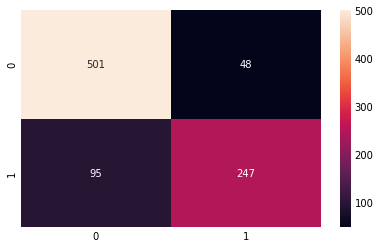

In [64]:
matrix = metrics.confusion_matrix(Y_train, Y_pred_rand)
sns.heatmap(matrix, annot = True,fmt = 'g')
plt.show()